### 데이터 준비

In [4]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [5]:
import numpy as np

In [6]:
fish_data = np.column_stack((fish_length, fish_weight))

In [7]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [8]:
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 훈련/테스트 세트 분리

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target)

In [11]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target)

### 훈련

In [12]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [14]:
print(kn.predict([[25, 150]]))

[0.]


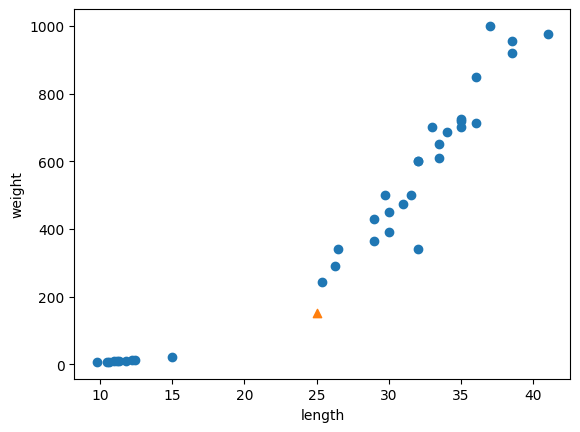

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [17]:
distances, indexes = kn.kneighbors([[25, 150]])

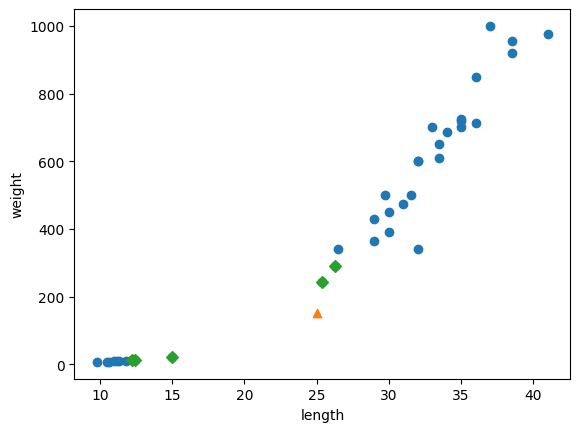

In [18]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

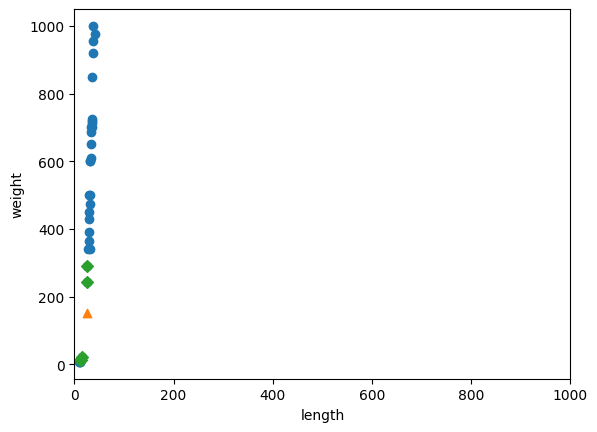

In [19]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [21]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean, std)

[ 26.83888889 439.69166667] [ 10.03788041 323.23705386]


In [22]:
train_scaled = (train_input - mean) / std

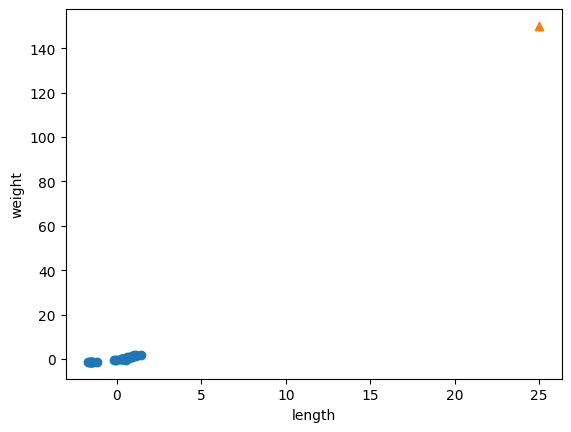

In [23]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [25]:
new = ([25, 150] - mean) / std

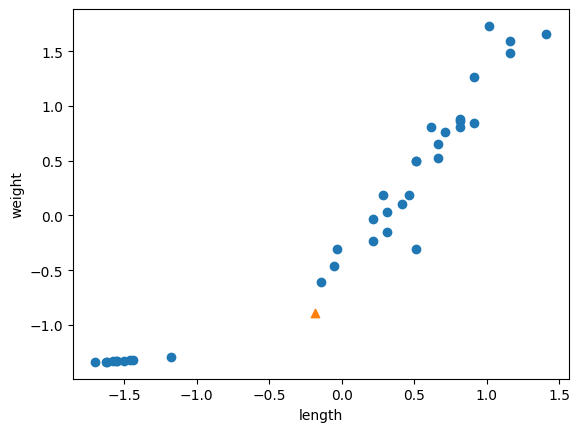

In [26]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [27]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [28]:
test_scaled = (test_input - mean) / std

In [29]:
kn.score(test_scaled, test_target)

1.0

In [30]:
print(kn.predict([new]))

[1.]


In [31]:
distances, indexes = kn.kneighbors([new])

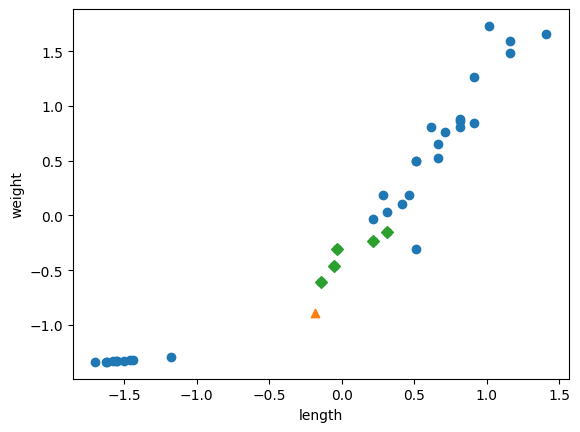

In [32]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()